In [140]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [141]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [142]:
# scale the data so that each feature has a single unit variance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1=df[['sepal_length','sepal_width','petal_width','petal_width']]
scaler.fit(df1)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [143]:
scaled_data=scaler.transform(df1)

In [144]:
from sklearn.decomposition import PCA

In [145]:
pca=PCA(n_components=3)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [146]:
x_pca=pca.transform(scaled_data)
scaled_data.shape

(150, 4)

In [147]:
x_pca.shape   # transformed to 3 dimensions

(150, 3)

In [148]:
principal_df=pd.DataFrame(data = x_pca, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
final_df = pd.concat([principal_df, df[['species']]], axis = 1)
final_df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [149]:
x_vals = final_df['principal component 1']
y_vals = final_df['principal component 2']
z_vals = final_df['principal component 3']

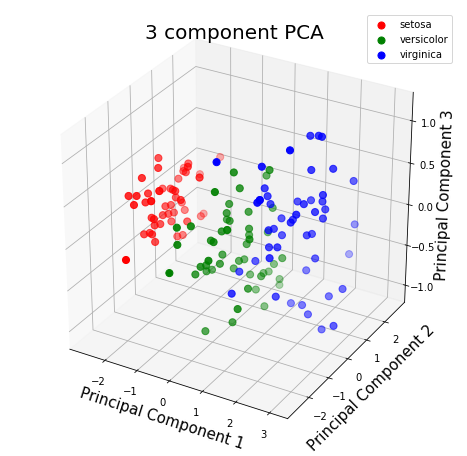

In [158]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import random
# Create the figure
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = ['setosa', 'versicolor', 'virginica']
colors = ['r', 'g', 'b']
for species, color in zip(targets,colors):
    indicesToKeep = final_df['species']==species
    ax.scatter(final_df.loc[indicesToKeep, 'principal component 1']
               , final_df.loc[indicesToKeep, 'principal component 2']
               , final_df.loc[indicesToKeep, 'principal component 3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
